## Importação das bibliotecas 

In [1]:
# importando as bibliotecas para manipulação dos dados
import pandas as pd
import pickle                 
import matplotlib.pyplot as plt    
import numpy as np                
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dados/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
colunas = {'Pregnancies': 'numero_gravidez', 'Glucose': 'glicose', 'BloodPressure': 'pressao_sanguinea', 
           'SkinThickness': 'espessura_pele_triceps', 'Insulin': 'insulina', 'BMI': 'imc', 
           'DiabetesPedigreeFunction': 'funcao_diabetes', 'Age': 'idade', 'Outcome': 'possui_diabetes'}

In [5]:
df = df.rename(columns= colunas)
df.columns = df.columns.str.upper()

In [6]:
df.head()

,NUMERO_GRAVIDEZ,GLICOSE,PRESSAO_SANGUINEA,ESPESSURA_PELE_TRICEPS,INSULINA,IMC,FUNCAO_DIABETES,IDADE,POSSUI_DIABETES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().values.any()

False

### Iniciando a Análise Exploratória

In [9]:
def plotar_correlacao(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

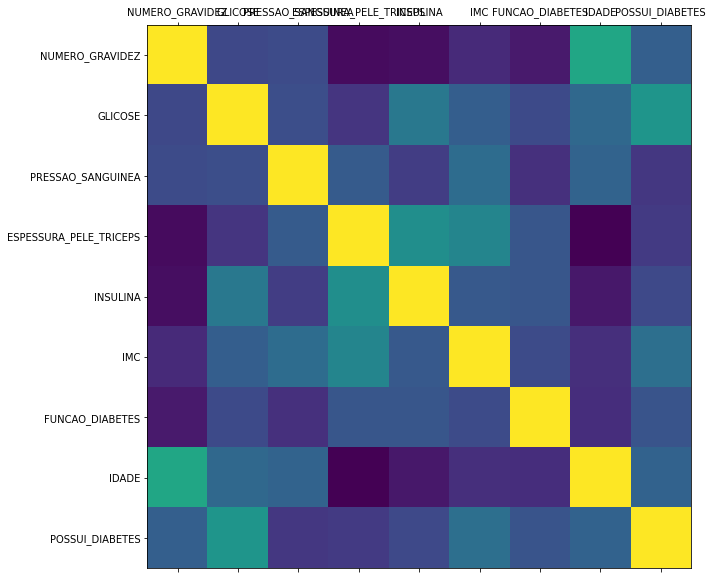

In [10]:
plotar_correlacao(df)

In [11]:
df.corr() > 0.5

,NUMERO_GRAVIDEZ,GLICOSE,PRESSAO_SANGUINEA,ESPESSURA_PELE_TRICEPS,INSULINA,IMC,FUNCAO_DIABETES,IDADE,POSSUI_DIABETES
NUMERO_GRAVIDEZ,True,False,False,False,False,False,False,True,False
GLICOSE,False,True,False,False,False,False,False,False,False
PRESSAO_SANGUINEA,False,False,True,False,False,False,False,False,False
ESPESSURA_PELE_TRICEPS,False,False,False,True,False,False,False,False,False
INSULINA,False,False,False,False,True,False,False,False,False
IMC,False,False,False,False,False,True,False,False,False
FUNCAO_DIABETES,False,False,False,False,False,False,True,False,False
IDADE,True,False,False,False,False,False,False,True,False
POSSUI_DIABETES,False,False,False,False,False,False,False,False,True


In [12]:
df.describe()

,NUMERO_GRAVIDEZ,GLICOSE,PRESSAO_SANGUINEA,ESPESSURA_PELE_TRICEPS,INSULINA,IMC,FUNCAO_DIABETES,IDADE,POSSUI_DIABETES
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


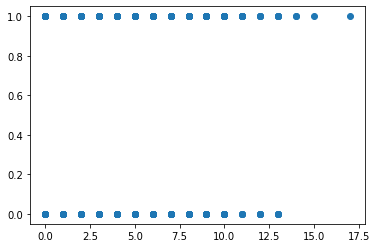

In [13]:
plt.scatter(df.NUMERO_GRAVIDEZ, df.POSSUI_DIABETES)
plt.show()

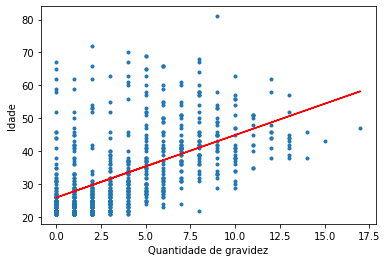

In [14]:
# Criando subset dos dados
df2 = df.copy()

# Definindo os valores de x e y
x = df2.NUMERO_GRAVIDEZ
y = df2.IDADE

# Computando os valores e gerando o gráfico
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-', color = "red")
plt.xlabel("Quantidade de gravidez")
plt.ylabel("Idade")
plt.title("")
plt.show()

### Tratando valores Missing

In [15]:
df.loc[df['NUMERO_GRAVIDEZ'] > 0, 'NUMERO_GRAVIDEZ'] = 1

In [16]:
df['NUMERO_GRAVIDEZ'].unique()

array([1, 0], dtype=int64)

In [17]:
num_true = len(df.loc[df['POSSUI_DIABETES'] == 1])
num_false = len(df.loc[df['POSSUI_DIABETES'] == 0])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)". format(num_true, (num_true / (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)". format(num_false, (num_false / (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [18]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing GLICOSE: {0}".format(len(df.loc[df['GLICOSE'] == 0])))
print("# Linhas missing PRESSAO_SANGUINEA: {0}".format(len(df.loc[df['PRESSAO_SANGUINEA'] == 0])))
print("# Linhas missing ESPESSURA_PELE_TRICEPS: {0}".format(len(df.loc[df['ESPESSURA_PELE_TRICEPS'] == 0])))
print("# Linhas missing INSULINA: {0}".format(len(df.loc[df['INSULINA'] == 0])))
print("# Linhas missing IMC: {0}".format(len(df.loc[df['IMC'] == 0])))
print("# Linhas missing IDADE: {0}".format(len(df.loc[df['IDADE'] == 0])))

# Linhas no dataframe 768
# Linhas missing GLICOSE: 5
# Linhas missing PRESSAO_SANGUINEA: 35
# Linhas missing ESPESSURA_PELE_TRICEPS: 227
# Linhas missing INSULINA: 374
# Linhas missing IMC: 11
# Linhas missing IDADE: 0


In [19]:
impute_mediana = SimpleImputer(missing_values=0, strategy='median')

### Separando  os dados para o Treinamento e Validações

In [20]:
x = df.drop('POSSUI_DIABETES', axis = 1).values
Y = df['POSSUI_DIABETES'].values

In [21]:
impute_mediana.fit(x)
x = impute_mediana.transform(x)

In [22]:
x

array([[  1.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  1.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [23]:
x[np.where(x == 0)]       

array([], dtype=float64)

In [24]:
split_test_size = 0.30
SEED = 42
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, Y, test_size = split_test_size, random_state = SEED)

In [25]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


# Criando os modelos de ML

### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [27]:
modelo_v1 = GaussianNB()

In [28]:
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [29]:
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Accuracy): 0.7403


In [30]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 48  32]
 [ 28 123]]

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.60      0.62        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [33]:
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))

Exatidão (Accuracy): 0.7273


In [34]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 50  30]
 [ 33 118]]
Classification Report
              precision    recall  f1-score   support

           1       0.60      0.62      0.61        80
           0       0.80      0.78      0.79       151

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



### Regressão Logistica

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [37]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7359
Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



## Exportando modelo treinado para um Arquivo

In [38]:
filename = '../dados/modelo_diabetes.pkl'
pickle.dump(modelo_v3, open(filename, 'wb'))

### Fazendo testes com o modelo

In [40]:
X_teste[5]
df.head()

,NUMERO_GRAVIDEZ,GLICOSE,PRESSAO_SANGUINEA,ESPESSURA_PELE_TRICEPS,INSULINA,IMC,FUNCAO_DIABETES,IDADE,POSSUI_DIABETES
0,1,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
colunas_diabetes = ['NUMERO_GRAVIDEZ','GLICOSE','PRESSAO_SANGUINEA','ESPESSURA_PELE_TRICEPS','INSULINA','IMC','FUNCAO_DIABETES','IDADE']

In [41]:
dados = {'NUMERO_GRAVIDEZ': 1, 'GLICOSE': 103, 'PRESSAO_SANGUINEA': 72, 
 'ESPESSURA_PELE_TRICEPS': 32, 'INSULINA': 190, 'IMC': 37.7, 'FUNCAO_DIABETES': 0.324, 'IDADE': 55}

In [48]:
dados =[dados[col] for col in colunas_diabetes]

In [50]:
modelo_v3.predict([dados])

array([0], dtype=int64)